### Topics 

- an introduction to robust and popular algorithms for classification, such as logistic regression, support vector machine, and decision trees
- examples and explanations using the scikit-learn machine learning library, which provides a wide variety of machine learning algorithms via a user-firendly Python API
- strengths and weaknesses of classifiers with linear and nonlinear decision boundaries

### Five Main Steps in Training a Supervised Machine Learning Algorithm

- Selecting a feature and collecting labeled training examples
- Choosing a Performance Metric
- Choosing a classifier and optimization algorithm
- Evaluating the performance of the model
- Tuning the algorithm

In [104]:
# Iris Dataset
# X : petal length, petal width 
# y : flower species 

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [105]:
iris = load_iris()

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [106]:
X = iris.data[:, [2, 3]] # feature data
y = iris.target # target data 

print('Class Labels : ', np.unique(y))

Class Labels :  [0 1 2]


In [120]:
# randomly split X and y arrays into 30% test data (45 examples), 70% training data (105 examples)
# stratify=y guarantees method retursn training and test subsets with same proportions of class lables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [121]:
# if stratify not applied 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [122]:
print('Labels Counts in y : ', np.bincount(y))
print('Labels Counts in y_train : ', np.bincount(y_train))
print('Labels Counts in y_test : ', np.bincount(y_test))

Labels Counts in y :  [50 50 50]
Labels Counts in y_train :  [36 32 37]
Labels Counts in y_test :  [14 18 13]


In [123]:
# if stratify applied 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [124]:
print('Labels Counts in y : ', np.bincount(y))
print('Labels Counts in y_train : ', np.bincount(y_train))
print('Labels Counts in y_test : ', np.bincount(y_test))

Labels Counts in y :  [50 50 50]
Labels Counts in y_train :  [35 35 35]
Labels Counts in y_test :  [15 15 15]


In [127]:
# Standardize the features using the StandardScaler class from Scikit-learn's preprocessing module
# StandardScaler : standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

In [130]:
sc = StandardScaler() # loaded the StandardScaler class 

sc.fit(X_train) # StandardScaler estimates the parameters, sample mean and std for each feature dimension

# by calling transform method, standardize the training data using those estimated parameters from above 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [131]:
# multiclass classification, one-ve.-rest (OvR) method
from sklearn.linear_model import Perceptron

In [133]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [138]:
# if the learning rate is too large, the algorithm will overshoot the global cost minimum 
# if the learning rate is too small, the algorithm will require more epochs until convergence

y_pred = ppn.predict(X_test_std)

print('Misclassified # : {0}'.format((y_test != y_pred).sum())) # misclassified 1 out of 45 target data , 2.2% 

Misclassified # : 1


In [141]:
# use of accuracy score 
from sklearn.metrics import accuracy_score
print('Accuracy : {0:4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 0.977778


In [143]:
# Perceptron never converges if the classes are not perfectly linearly separable
# overfitting : model captures the patterns in the training data well but fails to generalize well to unseen data

### Logistic Regression and Conditional Probabilities
- logistic regression is a classification moel that is very easy to implement and performs very well on linearly separable classes
- it is one of the most widely used algorithms for classification in industry 


In [144]:
import matplotlib.pyplot as plt

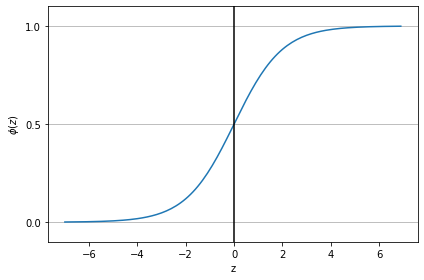

In [145]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#### The bias-variance Tradeoff
- Variance : measures the consistency of the model prediction for classifying a particular example if we retrain the model multiple times

- Bias : measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training sets

#### Regularization
- Regularization is a very useful method for handling collinearity 
- The concept behind regularization is to introduce additional information (bias) to penalize extereme parameter (weight) values
- The most common form of regularization is so-called L2 regularization